In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/pedro/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
import matplotlib.pyplot as plt

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Support vector machines (theory)

Support vector classifiers were conceived for binary classification. The basic idea is to maximize the margin between the separating hyperplane and the data samples -- assuming the two classes are linearly separable. To find such hyperplane we solve the following optimization problem:

\begin{align}
\min_{\mathbf{w}, b} & \ \ \frac{1}{2} \mathbf{w}^T \mathbf{w}   \\
s.t. & \ \  y_i(\mathbf{w} ^T \mathbf{x}_i + b) \geq 1 \ \ \ \forall i  \nonumber \\
& \ \ \xi_i \geq 0 \ \ \ \forall i \nonumber
\end{align}

We can relax the linearly separability by introducing slack variables $\xi$, which allow samples to violate the margin  -- with a penalty $C\xi_n$ in the cost function for each violation. This is called the soft margin classifier. $C$ is a tunable hyper-parameter that has to be optimized using a test set/cross validation.

\begin{align}
\min_{\mathbf{w}, b, \xi_i} & \ \ \frac{1}{2} \mathbf{w}^T \mathbf{w} + C \sum_{i=1}^N \xi_i \\
s.t. & \ \  y_i(\mathbf{w} ^T \mathbf{x}_i + b) \geq 1 - \xi_i \ \ \ \forall i  \nonumber \\
& \ \ \xi_i \geq 0 \ \ \ \forall i \nonumber
\end{align}

To make a prediction for a new sample $\mathbf{x}$: $y = \mathrm{sign}( \mathbf{w}^T \mathbf{x} + b)$.

This problem is convex and one can find the optimal solution -- as opposed to neural network which are non-convex and the trained parameters are only guaranteed to be local minima of the cost function.

There is a dual formulation of this problem -- we skip the details here -- which is easier to solve numerically. In this formulation, $\mathbf{w} = \sum_{i} \alpha_i y_i \mathbf{x_i}$ is a linear combination of the data. The $\alpha_i$ are found by solving the following optimization problem using the **Sequential minimal optimization** (SMO) algorithm.

\begin{align}
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(\mathbf{x_i}, \mathbf{x_j}) \alpha_i \alpha_j,\\
0 \leq \alpha_i \leq C, \quad \mbox{ for } i=1, 2, \ldots, n \\
\sum_{i=1}^n y_i \alpha_i = 0
\end{align}

where  $K(\mathbf{x_i}, \mathbf{x_j}) = \mathbf{x_i} \cdot \mathbf{x_j}$. 

*You only need to know the dot products of your data samples to use support vector machines.* This allows to use the **kernel trick** to work in higher dimensional spaces without adding new higher dimensional features to your data.

We can predict the class of new data samples also with the kernel trick 
$$
y = \mathrm{sign}( \sum_{i=1}^N \alpha_i y_i K(\mathbf{x_i}, \mathbf{x}) + b)
$$

## Kernel trick

* Polynomial kernel: $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x} \cdot \mathbf{z} + c)^d$
* Radial basis function (RBF) : $K(\mathbf{x}, \mathbf{z}) = e^{-\gamma|\mathbf{x}-\mathbf{z}|^2}$

Let's consider a simple example, where  $\mathbf{x}$, $\mathbf{z} \in \mathbb{R}^2$, $\mathbf{x}=(x_1,x_2), \mathbf{z}=(z_1, z_2)$. We choose the kernel $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x} \cdot \mathbf{z})^2$. You can check that $K(\mathbf{x}, \mathbf{z}) = \Phi(\mathbf{x}) \cdot \Phi(\mathbf{z})$, where 

$$
\Phi(\mathbf{x}) = (x_1^2, \sqrt{2}x_1x_2, x_2^2)^T
$$

The most popular kernel is the RBF, since it maps to an infinite dimensional space. For example, if  $\mathbf{x} \in \mathbb{R}^1$, it corresponds to the mapping:

$$
\Phi(x) = e^{-\gamma x^2} \left(1, \sqrt{\frac{2\gamma}{1!}}x,\sqrt{\frac{(2\gamma)^2}{2!}}x^2, \sqrt{\frac{(2\gamma)^3}{3!}}x^3, \ldots\right)^T
$$


## Linearly separable dataset

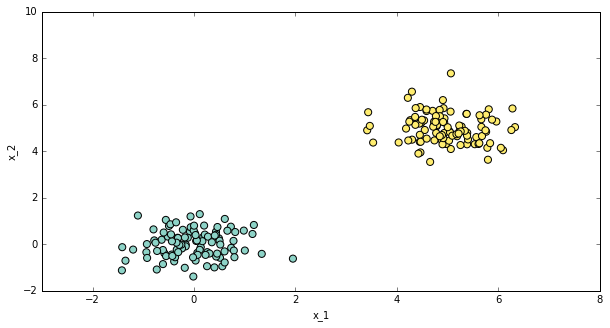

In [19]:
from sklearn.datasets.samples_generator import make_blobs

# Create the dataset
X, y = make_blobs(n_samples=200, centers=[[0,0], [5,5]],
                  cluster_std=0.60, random_state=12345)

# Plot samples
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set3');
plt.xlim(-3, 8)
plt.ylim(-2, 10)
plt.xlabel("x_1")
plt.ylabel("x_2")

### Scikit learn workflow

In scikit-learn, the typical workflow is to first choose the machine learning algorithm and its parameters -- this creates a python object which stores the model information. Then, we call the method **fit** and provide the training set -- this is the stage where things happen and the model is trained on the data. Finally, we can make predictions on new data or explore the learned model. 

In [20]:
from sklearn.svm import SVC # import support vector classifier
model = SVC(kernel='linear') # choose a linear model
model.fit(X, y) # fit the data
print "The decision function for the problem is: {:.5f}*x_1 + {:.5f}*x_2 + {:.5f}".format(model.coef_[0][0], model.coef_[0][1], model.intercept_[0])

The decision function for the problem is: 0.28011*x_1 + 0.37860*x_2 + -1.64696


Sklearn allows to extract the model learned parameters, e.g. model.coef\_ gives $\mathbf{w}$ and model.intercept\_ gives b.

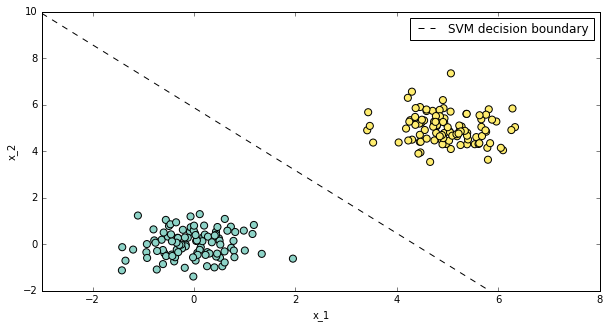

In [21]:
xx = np.linspace(-3, 8, 100)
# plot line where decision function is zero
plt.plot(xx, -(model.intercept_ + model.coef_[0][1]*xx)/model.coef_[0][0], 'k--', label="SVM decision boundary") 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set3');
plt.xlim(-3, 8)
plt.ylim(-2, 10)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend()

We have a found a linear decision function that separates that two classes in this simple problem!


# Non-linearly separable data (circumferences)

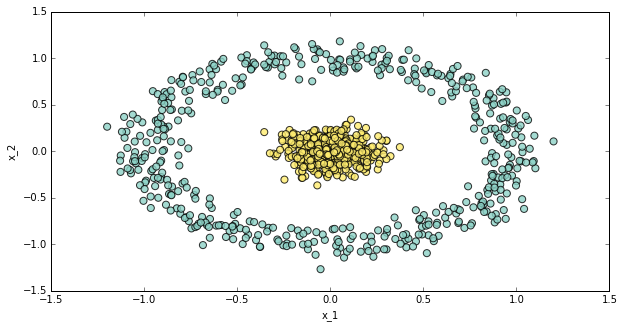

In [22]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=.1, noise=.1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='Set3', alpha=0.8)
plt.xlabel("x_1")
plt.ylabel("x_2")

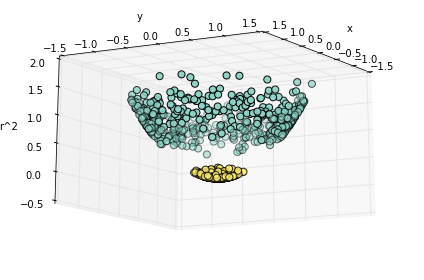

In [8]:
from mpl_toolkits import mplot3d
from IPython.html.widgets import interact


r_sq = X[:, 0]**2 + X[:, 1]**2

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r_sq, c=y, s=50, cmap='Set3')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r^2')
    plt.tight_layout()

interact(plot_3D, elev=[-90, 90], azim=(-180, 180)); # use (elev, azim) = (-15, 30)

In [9]:
def plot_svm_boundary_and_margins(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=1.0,
               linestyles=['--', '-', '--'], linewidths=[3.0]*3)

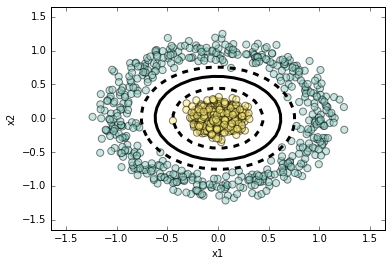

In [10]:
def svm_circles(log10_C):
    clf = SVC(kernel='poly', degree=2, C=10**log10_C).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set3', alpha=0.5)
    plot_svm_boundary_and_margins(clf)
    plt.xlabel("x1")
    plt.ylabel("x2")
    
interact(svm_circles, log10_C=[-3,3])

For large $C$ it separates perfectly the 2 classes, while at small $C$ it tries to find a *simpler* decision boundary in the quadratic space of features without worrying too much about misclassification. 

# Non-linearly separable data (RBF)

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. 
The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity 
of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training 
examples correctly. 

$\gamma$ defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [23]:
data = np.loadtxt("../spiral.data.txt")
X = data[:, [0,1]]
y = data[:, 2]

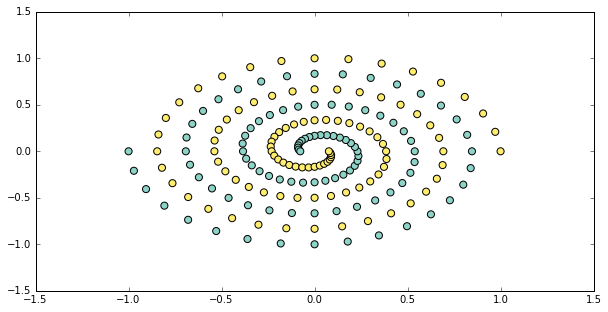

In [24]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='Set3', alpha=1.0)

In [25]:
def svm_spiral_poly(log10_C, degree):
    clf = SVC(kernel='poly', degree=int(degree), C=10**log10_C)
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set3', alpha=0.5)
    plot_svm_boundary_and_margins(clf)
    print clf.score(X, y)
    plt.xlabel("x1")
    plt.ylabel("x2")

0.5


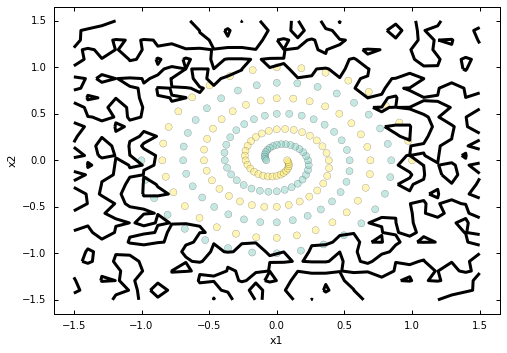

In [127]:
interact(svm_spiral_poly, log10_C=[-3,6], degree=[1, 20]);

In [26]:
def svm_spiral_rbm(log10_C, log10_gamma):
    clf = SVC(kernel='rbf', C=10**log10_C, gamma=10**log10_gamma).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set3', alpha=0.5)
    plot_svm_boundary_and_margins(clf)
    plt.xlabel("x1")
    plt.ylabel("x2")

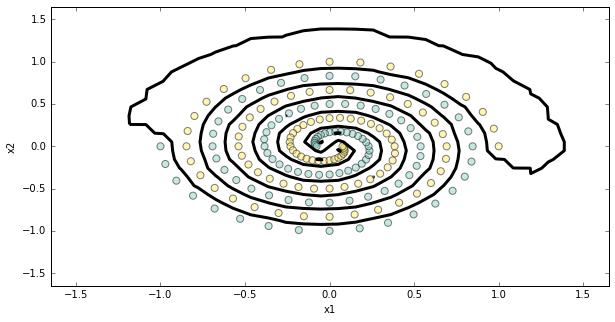

In [27]:
interact(svm_spiral_rbm, log10_C=[-3,6], log10_gamma=[-2, 5]); # use (2,3)

## MNIST dataset

There is a table with the test set accuracies of different algorithms on the MNIST dataset http://yann.lecun.com/exdb/mnist/ . 

In [35]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [36]:
X_m = mnist['data']; 
y_m = mnist['target'];
X_m = X_m[(y_m == 3) | (y_m == 8)]
y_m = y_m[(y_m == 3) | (y_m == 8)]

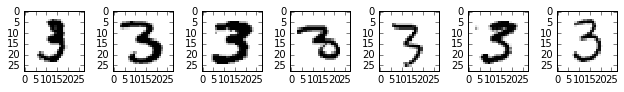

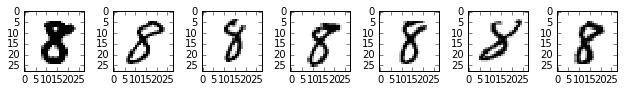

In [37]:
plt.figure(figsize=(10, 10))
for i in range(1, 8):
    plt.subplot(int("18" + str(i)))
    plt.imshow(np.reshape(X_m[i], (28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.tight_layout()
    
    
plt.figure(figsize=(10, 10))
for i in range(1, 8):
    plt.subplot(int("18" + str(i)))
    plt.imshow(np.reshape(X_m[-i], (28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.tight_layout()

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m, y_m, test_size=1000, train_size=1000, random_state=42)
X_train = X_train/255.0*2.0 - 1.0 # scale data (not very important in this case)
X_test = X_test/255.0*2.0 - 1.0 # scale data 

In [39]:
from sklearn.svm import SVC

In [40]:
def train_mnist_linear(log_C):
    clf = SVC(C=10**log_C, kernel='linear', cache_size=1000)
    clf.fit(X_train, y_train)
    print "C={}. Test set accuracy: {}.".format(10**log_C, clf.score(X_test, y_test))


def train_mnist(log_C, log_gamma):
    clf = SVC(C=10**log_C, gamma=10**log_gamma, cache_size=1000)
    clf.fit(X_train, y_train)
    print "C={}, gamma={}. Test set accuracy: {}.".format(10**log_C, 10**log_gamma, clf.score(X_test, y_test))

def mnist_results():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=5, step=.1, value=0, readout=False)
    gamma_slider = FloatSlider(min=-3, max=5, step=.1, value=0, readout=False)
    return interactive(train_mnist, log_C=C_slider, log_gamma=gamma_slider)

def mnist_results_linear():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=5, step=.1, value=0, readout=False)
    return interactive(train_mnist_linear, log_C=C_slider)

# linear model : C=0.0063095734448
# C=12.5892541179, gamma=0.00316227766017. Score: 0.974.

In [41]:
mnist_results_linear()

C=0.0063095734448. Test set accuracy: 0.953.


In [42]:
mnist_results()

C=39.8107170553, gamma=0.00316227766017. Test set accuracy: 0.974.
